# **Principal Component Analysis (PCA) with the Breast Cancer Dataset**

**Introduction**

Principal Component Analysis (PCA) is a dimensionality reduction technique that transforms high-dimensional data into a lower-dimensional form while retaining as much variance as possible. This is particularly useful for visualization and improving the performance of machine learning algorithms on high-dimensional datasets.

**Dataset Overview**

We'll utilize the Breast Cancer Wisconsin dataset from scikit-learn, which contains 569 samples with 30 numerical features each. The target variable indicates whether a tumor is malignant or benign.

# Setup and Data Loading

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Load the dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='target')

# Display basic information
print(f"Dataset shape: {X.shape}")
print(f"Target classes: {data.target_names}")

Dataset shape: (569, 30)
Target classes: ['malignant' 'benign']


# Exploratory Data Analysis

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64


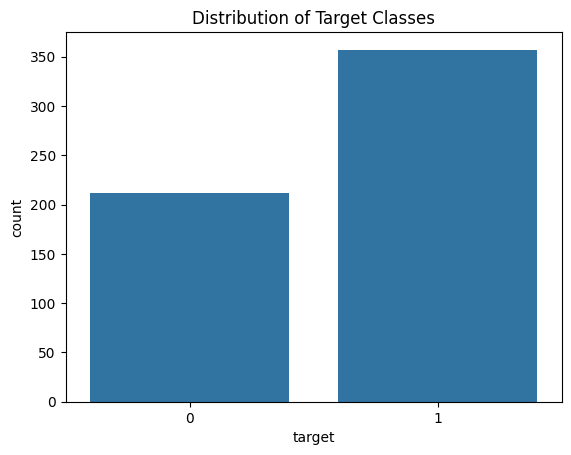

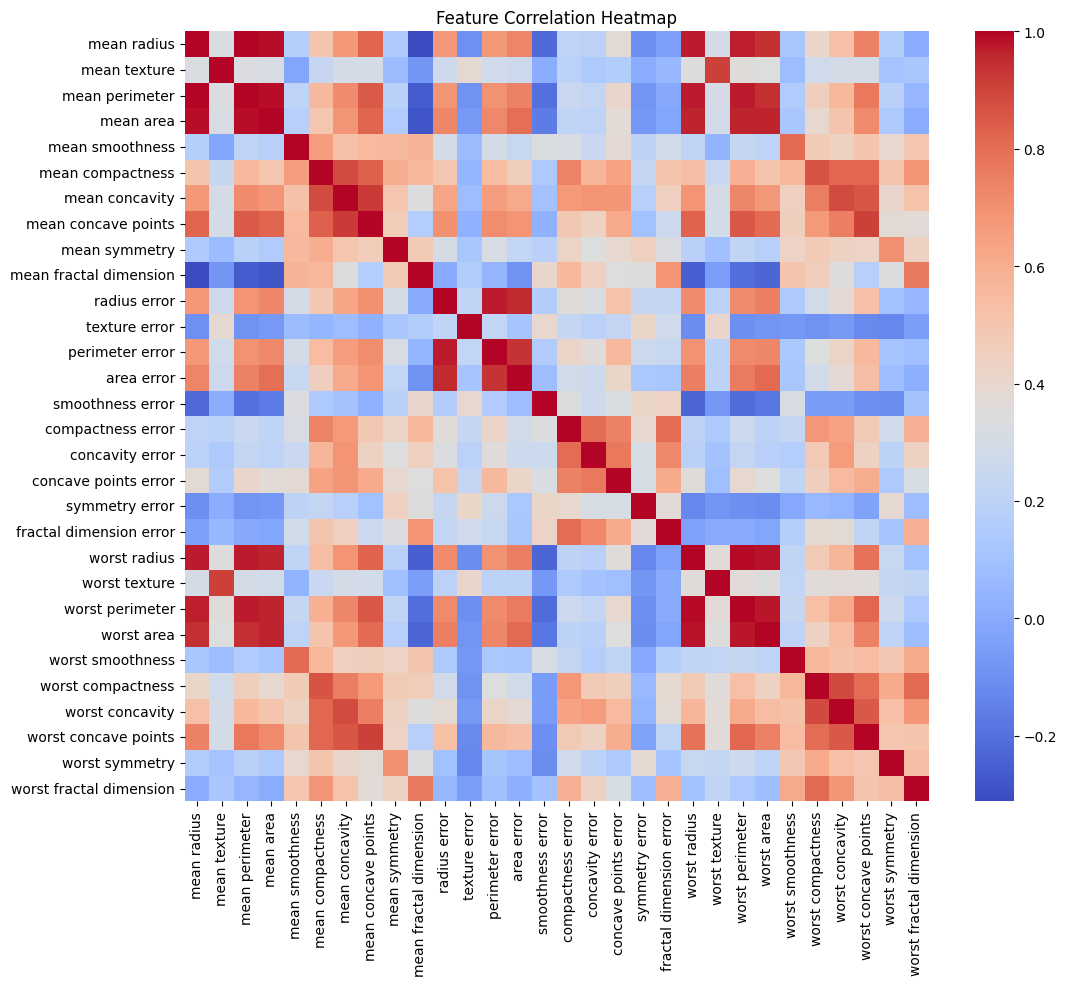

In [2]:
# Check for missing values
print(X.isnull().sum())

# Visualize the distribution of the target variable
sns.countplot(x=y)
plt.title('Distribution of Target Classes')
plt.show()

# Correlation heatmap
plt.figure(figsize=(12,10))
sns.heatmap(X.corr(), cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

# Data Preprocessing

In [3]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Mathematics of PCA

In [8]:
# Step 1: Center the Data
X_centered = X_scaled - np.mean(X_scaled, axis=0)

In [9]:
# Step 2: Compute the Covariance Matrix
cov_matrix = np.cov(X_centered.T)
print("Covariance Matrix Shape:", cov_matrix.shape)


Covariance Matrix Shape: (30, 30)


In [11]:
# Step 3: Compute Eigenvalues and Eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
# Display the first 5 eigenvalues
print("First 5 Eigenvalues:\n", eigenvalues[:5])
print("First 5 Eigenvectors:\n", eigenvectors[:, :5])

First 5 Eigenvalues:
 [13.30499079  5.7013746   2.82291016  1.98412752  1.65163324]
First 5 Eigenvectors:
 [[ 0.21890244 -0.23385713 -0.00853124  0.04140896 -0.03778635]
 [ 0.10372458 -0.05970609  0.0645499  -0.60305     0.04946885]
 [ 0.22753729 -0.21518136 -0.00931422  0.0419831  -0.03737466]
 [ 0.22099499 -0.23107671  0.02869953  0.0534338  -0.01033125]
 [ 0.14258969  0.18611302 -0.1042919   0.15938277  0.36508853]
 [ 0.23928535  0.15189161 -0.07409157  0.03179458 -0.01170397]
 [ 0.25840048  0.06016536  0.00273384  0.01912275 -0.08637541]
 [ 0.26085376 -0.0347675  -0.02556354  0.06533594  0.04386103]
 [ 0.13816696  0.19034877 -0.04023994  0.06712498  0.30594143]
 [ 0.06436335  0.36657547 -0.02257409  0.04858676  0.04442436]
 [ 0.20597878 -0.10555215  0.26848139  0.09794124  0.1544565 ]
 [ 0.01742803  0.08997968  0.37463367 -0.35985553  0.19165051]
 [ 0.21132592 -0.08945723  0.26664537  0.08899241  0.12099022]
 [ 0.20286964 -0.15229263  0.21600653  0.10820504  0.12757443]
 [ 0.014531

In [12]:
# Step 4: Sort Eigenvalues and Eigenvectors
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

In [13]:
# Step 5: Compute Explained Variance
explained_variance = eigenvalues / np.sum(eigenvalues)
print("Explained Variance:", explained_variance)

Explained Variance: [4.42720256e-01 1.89711820e-01 9.39316326e-02 6.60213492e-02
 5.49576849e-02 4.02452204e-02 2.25073371e-02 1.58872380e-02
 1.38964937e-02 1.16897819e-02 9.79718988e-03 8.70537901e-03
 8.04524987e-03 5.23365745e-03 3.13783217e-03 2.66209337e-03
 1.97996793e-03 1.75395945e-03 1.64925306e-03 1.03864675e-03
 9.99096464e-04 9.14646751e-04 8.11361259e-04 6.01833567e-04
 5.16042379e-04 2.72587995e-04 2.30015463e-04 5.29779290e-05
 2.49601032e-05 4.43482743e-06]


In [14]:
# Step 6: Project Data onto Principal Components
n_components = 2
W = eigenvectors[:, :n_components]
X_pca_manual = np.dot(X_centered, W)

In [15]:
# Apply PCA using sklearn for comparison
pca = PCA(n_components=2)
X_pca_sklearn = pca.fit_transform(X_scaled)

In [16]:
# Verify that the manual implementation and sklearn implementation are similar
print("Difference between manual and sklearn PCA:\n", np.abs(X_pca_manual - X_pca_sklearn).mean())


Difference between manual and sklearn PCA:
 1.3105576719536485e-15


# Visualizing Principal Components

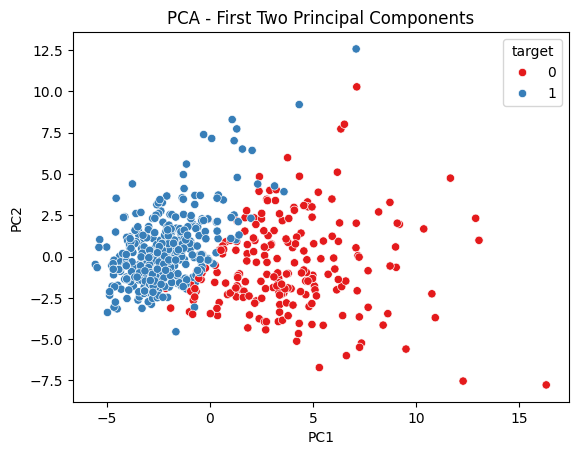

In [17]:
# Create a DataFrame with principal components
pca_df = pd.DataFrame(data=X_pca_sklearn, columns=['PC1', 'PC2'])
pca_df['target'] = y

# Scatter plot of the two principal components
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='target', palette='Set1')
plt.title('PCA - First Two Principal Components')
plt.show()

# Model Training and Evaluation

In [20]:
# Train a logistic regression model on the original data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

lr_original = LogisticRegression(max_iter=10000)
lr_original.fit(X_train, y_train)
y_pred_original = lr_original.predict(X_test)

print("Classification Report (Original Data):")
print(classification_report(y_test, y_pred_original))

Classification Report (Original Data):
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



# Model Training and Evaluation with PCA

In [21]:
# Apply PCA to retain 95% of the variance
pca_95 = PCA(n_components=0.95)
X_pca_95 = pca_95.fit_transform(X_scaled)

In [22]:
# Split the PCA-transformed data
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca_95, y, test_size=0.2, random_state=42)

# Train a logistic regression model on the PCA-transformed data
lr_pca = LogisticRegression(max_iter=10000)
lr_pca.fit(X_train_pca, y_train)
y_pred_pca = lr_pca.predict(X_test_pca)


In [24]:
print("Classification Report (PCA-Transformed Data):")
print(classification_report(y_test, y_pred_pca))

Classification Report (PCA-Transformed Data):
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        43
           1       0.99      0.99      0.99        71

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In this notebook, we've demonstrated how PCA can be applied to reduce the dimensionality of the Breast Cancer dataset while retaining most of the variance. The logistic regression model performed comparably on both the original and PCA-transformed data, indicating that PCA can be a valuable tool for simplifying datasets without significant loss of information.

